<a href="https://colab.research.google.com/github/Stepeech/NNLearn/blob/main/%D0%9F%D0%A07_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №7. Использование автоэнкодера для решения задач семантической сегментации. Часть 1**

# Этап 1. Выбор и обработка исходных данных. Разделение на обучающую и тестовую выборку

# Разделение данных по папкам на обучающую и проверочную выборку 


Ниже представлен Код для разделения папки на train и val.
После создания новых папок переименуйте их и расположите в формате, приведенном ниже, для использования для семантической сегментации с помощью генераторов данных. 

[Документация](https://pypi.org/project/split-folders/) 

### Подсказка

In [ ]:
%pip install split-folders
%pip install patchify



  Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached patchify-0.2.3-py3-none-any.whl (6.6 kB)
                                              0.0/14.8 MB ? eta -:--:--
                                             0.0/14.8 MB 991.0 kB/s eta 0:00:15
                                              0.1/14.8 MB 1.4 MB/s eta 0:00:11
                                              0.2/14.8 MB 1.5 MB/s eta 0:00:10
                                              0.2/14.8 MB 1.5 MB/s eta 0:00:10
                                              0.3/14.8 MB 1.6 MB/s eta 0:00:10
     -                                        0.4/14.8 MB 1.8 MB/s eta 0:00:09
     -                                        0.5/14.8 MB 1.7 MB/s eta 0:00:09
     -                                        0.6/14.8 MB 1.7 MB/s eta 0:00:09
     -                                        0.7/14.8 MB 1.7 MB/s eta 0:00:09
     --                          

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from PIL import Image
import cv2
from patchify import patchify
import numpy as np


In [ ]:
root_directory = r'C:/Users/Stepan/ai/Semantic segmentation dataset/'
patch_size = 256

In [ ]:
image_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':   
        images = os.listdir(path)
        for i, image_name in enumerate(images):  
            if image_name.endswith(".jpg"):   
                image = cv2.imread(path+"/"+image_name, 1)  
                SIZE_X = (image.shape[1]//patch_size)*patch_size 
                SIZE_Y = (image.shape[0]//patch_size)*patch_size  
                image = Image.fromarray(image)
                image = image.crop((0 ,0, SIZE_X, SIZE_Y))  
                image = np.array(image)             
       
                # Разделяем изображение на части
                print("Now patchifying image:", path+"/"+image_name)
                patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap
        
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        
                        single_patch_img = patches_img[i,j,:,:]
                        single_patch_img = single_patch_img[0] # Убираем лишние ненужные каналы, которые добавляет patchify.                              
                        # image_dataset.append(single_patch_img)
          
                        cv2.imwrite(root_directory+"Image/" + image_name + 
                                   "_patch_" + str(i) + str(j) + ".jpg", single_patch_img)


C:/Users/Stepan/ai/Semantic segmentation dataset/
C:/Users/Stepan/ai/Semantic segmentation dataset/Image
C:/Users/Stepan/ai/Semantic segmentation dataset/Masks
C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1
C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\images
Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\images/image_part_001.jpg
Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\images/image_part_002.jpg
Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\images/image_part_003.jpg
Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\images/image_part_004.jpg
Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\images/image_part_005.jpg
Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\images/image_part_006.jpg
Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\images/image

Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 8\images/image_part_002.jpg
Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 8\images/image_part_003.jpg
Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 8\images/image_part_004.jpg
Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 8\images/image_part_005.jpg
Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 8\images/image_part_006.jpg
Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 8\images/image_part_007.jpg
Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 8\images/image_part_008.jpg
Now patchifying image: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 8\images/image_part_009.jpg
C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 8\masks


In [ ]:
mask_dataset = []  
for path, subdirs, files in os.walk(root_directory):
    #print(path)  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks': 
        masks = os.listdir(path)  
        for i, mask_name in enumerate(masks):  
            if mask_name.endswith(".png"):  
               
                mask = cv2.imread(path+"/"+mask_name, 1)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size
                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))
                mask = np.array(mask)             
       
                print("Now patchifying mask:", path+"/"+mask_name)
                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)
        
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        
                        single_patch_mask = patches_mask[i,j,:,:]
                        single_patch_mask = single_patch_mask[0]                               

                        cv2.imwrite(root_directory+"Masks/" + mask_name + 
                                   "_patch_" + str(i) + str(j) + ".png", single_patch_mask)


Now patchifying mask: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\masks/image_part_001.png
Now patchifying mask: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\masks/image_part_002.png
Now patchifying mask: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\masks/image_part_003.png
Now patchifying mask: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\masks/image_part_004.png
Now patchifying mask: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\masks/image_part_005.png
Now patchifying mask: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\masks/image_part_006.png
Now patchifying mask: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\masks/image_part_007.png
Now patchifying mask: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\masks/image_part_008.png
Now patchifying mask: C:/Users/Stepan/ai/Semantic segmentation dataset/Tile 1\masks/image_part_009.png
Now patchifying mask: C:/Users/Stepan/ai/Semantic segmentation dataset/Ti

In [ ]:
import splitfolders  

input_folder = r'C:/Users/Stepan/ai/Semantic segmentation dataset'
output_folder = r'C:/Users/Stepan/ai/data_for_training_and_testing'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) 

Структура конечных папок для генератора (ImageDataGenerator()): 

(После разделения на папки, нужно разместить вручную или написать для этого специальную функцию, например, используя модуль shutil)



```
dataset
        train_image
                    train
        train_mask
                    train
        val_image
                    val
        val_mask
                    val
```



#.

In [ ]:
train_img_dir = r'C:\\Users\\Stepan\\ai\\train_image\\train'
train_mask_dir = r'C:\\Users\\Stepan\\ai\\train_mask\\train'

img_list = sorted(os.listdir(train_img_dir))
msk_list = sorted(os.listdir(train_mask_dir))

num_images = len(os.listdir(train_img_dir))

print(img_list, msk_list)

['image_part_001.jpg_patch_00.jpg', 'image_part_001.jpg_patch_01.jpg', 'image_part_001.jpg_patch_02.jpg', 'image_part_001.jpg_patch_03.jpg', 'image_part_001.jpg_patch_04.jpg', 'image_part_001.jpg_patch_05.jpg', 'image_part_001.jpg_patch_07.jpg', 'image_part_001.jpg_patch_10.jpg', 'image_part_001.jpg_patch_11.jpg', 'image_part_001.jpg_patch_12.jpg', 'image_part_001.jpg_patch_13.jpg', 'image_part_001.jpg_patch_14.jpg', 'image_part_001.jpg_patch_15.jpg', 'image_part_001.jpg_patch_16.jpg', 'image_part_001.jpg_patch_17.jpg', 'image_part_001.jpg_patch_21.jpg', 'image_part_001.jpg_patch_22.jpg', 'image_part_001.jpg_patch_23.jpg', 'image_part_001.jpg_patch_24.jpg', 'image_part_001.jpg_patch_25.jpg', 'image_part_001.jpg_patch_26.jpg', 'image_part_001.jpg_patch_30.jpg', 'image_part_001.jpg_patch_32.jpg', 'image_part_001.jpg_patch_35.jpg', 'image_part_001.jpg_patch_37.jpg', 'image_part_001.jpg_patch_42.jpg', 'image_part_001.jpg_patch_45.jpg', 'image_part_001.jpg_patch_46.jpg', 'image_part_001.jpg

<Figure size 1200x800 with 0 Axes>

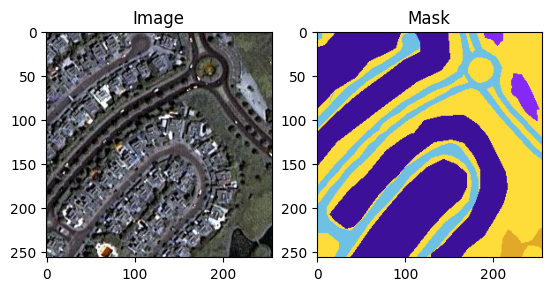

<Figure size 1200x800 with 0 Axes>

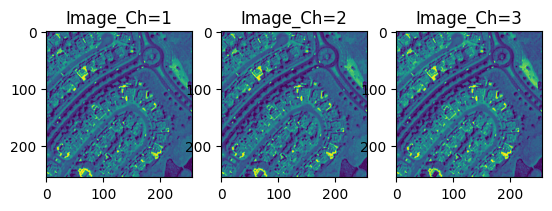

<Figure size 1200x800 with 0 Axes>

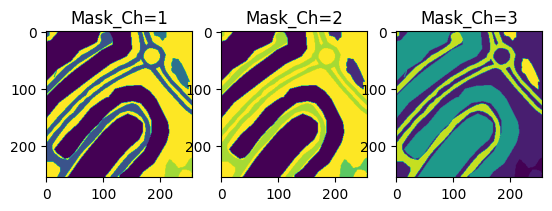

In [ ]:
import random
from matplotlib import pyplot as plt

img_num = random.randint(0, num_images-1)

img_for_plot = cv2.imread(os.path.join(train_img_dir, img_list[img_num]))
img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_for_plot =cv2.imread(os.path.join(train_mask_dir, msk_list[img_num]))
mask_for_plot = cv2.cvtColor(mask_for_plot, cv2.COLOR_BGR2RGB)

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 2)

axis[0].imshow(img_for_plot, cmap=plt.get_cmap('gray'),vmin=0,vmax=100)
axis[0].set_title('Image')

axis[1].imshow(mask_for_plot)
axis[1].set_title('Mask')

plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 3)

axis[0].imshow(img_for_plot[:,:,0])
axis[0].set_title('Image_Ch=1')

axis[1].imshow(img_for_plot[:,:,1])
axis[1].set_title('Image_Ch=2')

axis[2].imshow(img_for_plot[:,:,2])
axis[2].set_title('Image_Ch=3')

plt.show()

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
 
figure, axis = plt.subplots(1, 3)

axis[0].imshow(mask_for_plot[:,:,0])
axis[0].set_title("Mask_Ch=1")

axis[1].imshow(mask_for_plot[:,:,1])
axis[1].set_title("Mask_Ch=2")

axis[2].imshow(mask_for_plot[:,:,2])
axis[2].set_title("Mask_Ch=3")

plt.show()


# Этап 2. Предобработка обучающей и валидационной выборки. Разработка архитектуры модели

In [ ]:
%env SM_FRAMEWORK=tf.keras
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import segmentation_models as sm
from keras.metrics import MeanIoU
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler, StandardScaler


env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


In [ ]:
import tensorflow as tf
len(tf.config.list_physical_devices('GPU'))>0

True

In [ ]:
import tensorflow
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5234232587460210904
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5819596800
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3812411346776715732
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [ ]:

Building = np.array((60, 16, 152))
Land = np.array((132, 41, 246))
Road = np.array((110, 193, 228))
Vegetation = np.array((254, 221, 58))
Water = np.array((226, 169, 41))
Unlabeled = np.array((155, 155, 155))


In [ ]:
def rgb_to_2D_label(label):
    if len(label.shape) == 3: 
        label = label[:,:,:3]
    if len(label.shape) == 4: 
        label = label[:,:,:,:3]

    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5


    if len(label.shape) == 3: 
        label_seg = label_seg[:,:,0]
    if len(label.shape) == 4: 
        label_seg = label_seg[:,:,:,0]
        
    return label_seg

scaler = MinMaxScaler()
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

def preprocess_data(img, mask, num_class):
    img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = preprocess_input(img) 
    mask = rgb_to_2D_label(mask)
    mask = to_categorical(mask, num_class)
      
    return (img, mask)

In [ ]:
seed=24
batch_size=16
n_classes=6

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True)
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)

In [ ]:
train_img_path = r'C:\\Users\\Stepan\\ai\\train_image'
train_mask_path = r'C:\\Users\\Stepan\\ai\\train_mask'
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=6)

val_img_path = r'C:\\Users\\Stepan\\ai\\val_image'
val_mask_path = r'C:\\Users\\Stepan\\ai\\val_mask'
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=6)

In [ ]:
num_train_imgs = len(os.listdir(r'C:\\Users\\Stepan\\ai\\train_image\\train'))
num_val_images = len(os.listdir(r'C:\\Users\\Stepan\\ai\\val_image\\val'))

steps_per_epoch = num_train_imgs//batch_size
val_steps_per_epoch = num_val_images//batch_size


# Этап 3. Обучение модели

* Изучите техническую докуентацию по работе с модулем [Segmentation Models](https://segmentation-models.readthedocs.io/en/latest/tutorial.html)

* Последовательно обучите несколько моделей, используя при этом разные [функции потерь ](https://segmentation-models.readthedocs.io/en/latest/api.html#losses)

> [Реализация всех имеющихся в модуле функций потерь на GIT разработчиков](https://github.com/qubvel/segmentation_models/blob/master/segmentation_models/losses.py)

* При обучении используйте несколько метрик [метрик](https://segmentation-models.readthedocs.io/en/latest/api.html#metrics), определив их в массиве.



Пример:

```
metrics = ['accuracy', sm.metrics.iou_score]

model.compile('Adam', loss=sm.losses.categorical_focal_jaccard_loss, metrics=metrics)
```
> [Реализация всех имеющихся в модуле метрик на GIT разработчиков](https://github.com/qubvel/segmentation_models/blob/master/segmentation_models/metrics.py)



**Сategorical Focal Jaccard Loss**

In [ ]:
metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
model_1 = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')

model_1.compile(optimizer='adam', loss=sm.losses.categorical_focal_jaccard_loss, metrics=metrics)
model_1.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_102 (ZeroPaddin  (None, None, None,   0          ['bn_data[0][0]']                
 g2D)                           3)                                                          

                                                                                                  
 stage1_unit3_bn1 (BatchNormali  (None, None, None,   256        ['add_49[0][0]']                 
 zation)                        64)                                                               
                                                                                                  
 stage1_unit3_relu1 (Activation  (None, None, None,   0          ['stage1_unit3_bn1[0][0]']       
 )                              64)                                                               
                                                                                                  
 zero_padding2d_108 (ZeroPaddin  (None, None, None,   0          ['stage1_unit3_relu1[0][0]']     
 g2D)                           64)                                                               
                                                                                                  
 stage1_un

                                128)                              'add_51[0][0]']                 
                                                                                                  
 stage2_unit3_bn1 (BatchNormali  (None, None, None,   512        ['add_52[0][0]']                 
 zation)                        128)                                                              
                                                                                                  
 stage2_unit3_relu1 (Activation  (None, None, None,   0          ['stage2_unit3_bn1[0][0]']       
 )                              128)                                                              
                                                                                                  
 zero_padding2d_114 (ZeroPaddin  (None, None, None,   0          ['stage2_unit3_relu1[0][0]']     
 g2D)                           128)                                                              
          

 add_55 (Add)                   (None, None, None,   0           ['stage3_unit1_conv2[0][0]',     
                                256)                              'stage3_unit1_sc[0][0]']        
                                                                                                  
 stage3_unit2_bn1 (BatchNormali  (None, None, None,   1024       ['add_55[0][0]']                 
 zation)                        256)                                                              
                                                                                                  
 stage3_unit2_relu1 (Activation  (None, None, None,   0          ['stage3_unit2_bn1[0][0]']       
 )                              256)                                                              
                                                                                                  
 zero_padding2d_120 (ZeroPaddin  (None, None, None,   0          ['stage3_unit2_relu1[0][0]']     
 g2D)     

                                                                                                  
 stage3_unit5_bn1 (BatchNormali  (None, None, None,   1024       ['add_58[0][0]']                 
 zation)                        256)                                                              
                                                                                                  
 stage3_unit5_relu1 (Activation  (None, None, None,   0          ['stage3_unit5_bn1[0][0]']       
 )                              256)                                                              
                                                                                                  
 zero_padding2d_126 (ZeroPaddin  (None, None, None,   0          ['stage3_unit5_relu1[0][0]']     
 g2D)                           256)                                                              
                                                                                                  
 stage3_un

                                512)                              'stage4_unit1_sc[0][0]']        
                                                                                                  
 stage4_unit2_bn1 (BatchNormali  (None, None, None,   2048       ['add_61[0][0]']                 
 zation)                        512)                                                              
                                                                                                  
 stage4_unit2_relu1 (Activation  (None, None, None,   0          ['stage4_unit2_bn1[0][0]']       
 )                              512)                                                              
                                                                                                  
 zero_padding2d_132 (ZeroPaddin  (None, None, None,   0          ['stage4_unit2_relu1[0][0]']     
 g2D)                           512)                                                              
          

                                                                                                  
 decoder_stage0b_relu (Activati  (None, None, None,   0          ['decoder_stage0b_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 decoder_stage1_upsampling (UpS  (None, None, None,   0          ['decoder_stage0b_relu[0][0]']   
 ampling2D)                     256)                                                              
                                                                                                  
 decoder_stage1_concat (Concate  (None, None, None,   0          ['decoder_stage1_upsampling[0][0]
 nate)                          384)                             ',                               
                                                                  'stage3_unit1_relu1[0][0]']     
          

                                16)                              ']                               
                                                                                                  
 decoder_stage4a_bn (BatchNorma  (None, None, None,   64         ['decoder_stage4a_conv[0][0]']   
 lization)                      16)                                                               
                                                                                                  
 decoder_stage4a_relu (Activati  (None, None, None,   0          ['decoder_stage4a_bn[0][0]']     
 on)                            16)                                                               
                                                                                                  
 decoder_stage4b_conv (Conv2D)  (None, None, None,   2304        ['decoder_stage4a_relu[0][0]']   
                                16)                                                               
          

In [ ]:
history_1=model_1.fit(train_img_gen, steps_per_epoch=steps_per_epoch, epochs=65, verbose=1, validation_steps=val_steps_per_epoch, validation_data=val_img_gen)

Epoch 1/65
25/25 [==============================] - 13s 425ms/step - loss: 0.8121 - accuracy: 0.6318 - iou_score: 0.2182 - f1-score: 0.3133 - val_loss: 1.5392 - val_accuracy: 0.1571 - val_iou_score: 0.0268 - val_f1-score: 0.0464
Epoch 2/65
25/25 [==============================] - 11s 434ms/step - loss: 0.6387 - accuracy: 0.7910 - iou_score: 0.3861 - f1-score: 0.5020 - val_loss: 1.5036 - val_accuracy: 0.2002 - val_iou_score: 0.0332 - val_f1-score: 0.0552
Epoch 3/65
25/25 [==============================] - 10s 419ms/step - loss: 0.5510 - accuracy: 0.8045 - iou_score: 0.4799 - f1-score: 0.5980 - val_loss: 1.5911 - val_accuracy: 0.0625 - val_iou_score: 0.0261 - val_f1-score: 0.0495
Epoch 4/65
25/25 [==============================] - 10s 415ms/step - loss: 0.5349 - accuracy: 0.8093 - iou_score: 0.4982 - f1-score: 0.6134 - val_loss: 1.5804 - val_accuracy: 0.0358 - val_iou_score: 0.0063 - val_f1-score: 0.0122
Epoch 5/65
25/25 [==============================] - 10s 413ms/step - loss: 0.5047 - 

Epoch 37/65
25/25 [==============================] - 10s 407ms/step - loss: 0.4143 - accuracy: 0.8715 - iou_score: 0.6088 - f1-score: 0.6998 - val_loss: 0.9161 - val_accuracy: 0.5771 - val_iou_score: 0.1807 - val_f1-score: 0.2634
Epoch 38/65
25/25 [==============================] - 10s 405ms/step - loss: 0.4132 - accuracy: 0.8755 - iou_score: 0.6099 - f1-score: 0.6973 - val_loss: 0.9765 - val_accuracy: 0.5481 - val_iou_score: 0.1435 - val_f1-score: 0.2066
Epoch 39/65
25/25 [==============================] - 10s 402ms/step - loss: 0.4108 - accuracy: 0.8772 - iou_score: 0.6098 - f1-score: 0.6982 - val_loss: 0.8296 - val_accuracy: 0.6758 - val_iou_score: 0.2514 - val_f1-score: 0.3326
Epoch 40/65
25/25 [==============================] - 10s 402ms/step - loss: 0.4033 - accuracy: 0.8773 - iou_score: 0.6197 - f1-score: 0.7064 - val_loss: 0.8732 - val_accuracy: 0.6224 - val_iou_score: 0.2148 - val_f1-score: 0.2951
Epoch 41/65
25/25 [==============================] - 10s 402ms/step - loss: 0.39

**Categorical Cross Entropy Loss**

In [ ]:
metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
model_2 = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')

model_2.compile(optimizer='adam', loss=sm.losses.CategoricalCELoss(), metrics=metrics)
model_2.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_136 (ZeroPaddin  (None, None, None,   0          ['bn_data[0][0]']                
 g2D)                           3)                                                          

                                                                                                  
 stage1_unit3_bn1 (BatchNormali  (None, None, None,   256        ['add_65[0][0]']                 
 zation)                        64)                                                               
                                                                                                  
 stage1_unit3_relu1 (Activation  (None, None, None,   0          ['stage1_unit3_bn1[0][0]']       
 )                              64)                                                               
                                                                                                  
 zero_padding2d_142 (ZeroPaddin  (None, None, None,   0          ['stage1_unit3_relu1[0][0]']     
 g2D)                           64)                                                               
                                                                                                  
 stage1_un

                                128)                              'add_67[0][0]']                 
                                                                                                  
 stage2_unit3_bn1 (BatchNormali  (None, None, None,   512        ['add_68[0][0]']                 
 zation)                        128)                                                              
                                                                                                  
 stage2_unit3_relu1 (Activation  (None, None, None,   0          ['stage2_unit3_bn1[0][0]']       
 )                              128)                                                              
                                                                                                  
 zero_padding2d_148 (ZeroPaddin  (None, None, None,   0          ['stage2_unit3_relu1[0][0]']     
 g2D)                           128)                                                              
          

 add_71 (Add)                   (None, None, None,   0           ['stage3_unit1_conv2[0][0]',     
                                256)                              'stage3_unit1_sc[0][0]']        
                                                                                                  
 stage3_unit2_bn1 (BatchNormali  (None, None, None,   1024       ['add_71[0][0]']                 
 zation)                        256)                                                              
                                                                                                  
 stage3_unit2_relu1 (Activation  (None, None, None,   0          ['stage3_unit2_bn1[0][0]']       
 )                              256)                                                              
                                                                                                  
 zero_padding2d_154 (ZeroPaddin  (None, None, None,   0          ['stage3_unit2_relu1[0][0]']     
 g2D)     

                                                                                                  
 stage3_unit5_bn1 (BatchNormali  (None, None, None,   1024       ['add_74[0][0]']                 
 zation)                        256)                                                              
                                                                                                  
 stage3_unit5_relu1 (Activation  (None, None, None,   0          ['stage3_unit5_bn1[0][0]']       
 )                              256)                                                              
                                                                                                  
 zero_padding2d_160 (ZeroPaddin  (None, None, None,   0          ['stage3_unit5_relu1[0][0]']     
 g2D)                           256)                                                              
                                                                                                  
 stage3_un

                                512)                              'stage4_unit1_sc[0][0]']        
                                                                                                  
 stage4_unit2_bn1 (BatchNormali  (None, None, None,   2048       ['add_77[0][0]']                 
 zation)                        512)                                                              
                                                                                                  
 stage4_unit2_relu1 (Activation  (None, None, None,   0          ['stage4_unit2_bn1[0][0]']       
 )                              512)                                                              
                                                                                                  
 zero_padding2d_166 (ZeroPaddin  (None, None, None,   0          ['stage4_unit2_relu1[0][0]']     
 g2D)                           512)                                                              
          

                                                                                                  
 decoder_stage0b_relu (Activati  (None, None, None,   0          ['decoder_stage0b_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 decoder_stage1_upsampling (UpS  (None, None, None,   0          ['decoder_stage0b_relu[0][0]']   
 ampling2D)                     256)                                                              
                                                                                                  
 decoder_stage1_concat (Concate  (None, None, None,   0          ['decoder_stage1_upsampling[0][0]
 nate)                          384)                             ',                               
                                                                  'stage3_unit1_relu1[0][0]']     
          

                                16)                              ']                               
                                                                                                  
 decoder_stage4a_bn (BatchNorma  (None, None, None,   64         ['decoder_stage4a_conv[0][0]']   
 lization)                      16)                                                               
                                                                                                  
 decoder_stage4a_relu (Activati  (None, None, None,   0          ['decoder_stage4a_bn[0][0]']     
 on)                            16)                                                               
                                                                                                  
 decoder_stage4b_conv (Conv2D)  (None, None, None,   2304        ['decoder_stage4a_relu[0][0]']   
                                16)                                                               
          

In [ ]:
history_2=model_2.fit(train_img_gen, steps_per_epoch=steps_per_epoch, epochs=65, verbose=1, validation_steps=val_steps_per_epoch, validation_data=val_img_gen)

Epoch 1/65
25/25 [==============================] - 13s 418ms/step - loss: 0.1919 - accuracy: 0.6114 - iou_score: 0.1645 - f1-score: 0.2564 - val_loss: 1.2646 - val_accuracy: 0.5289 - val_iou_score: 0.0883 - val_f1-score: 0.1140
Epoch 2/65
25/25 [==============================] - 10s 402ms/step - loss: 0.1153 - accuracy: 0.7731 - iou_score: 0.3059 - f1-score: 0.4311 - val_loss: 1.3001 - val_accuracy: 0.5159 - val_iou_score: 0.0865 - val_f1-score: 0.1140
Epoch 3/65
25/25 [==============================] - 10s 403ms/step - loss: 0.0956 - accuracy: 0.8076 - iou_score: 0.3766 - f1-score: 0.5052 - val_loss: 0.9488 - val_accuracy: 0.5018 - val_iou_score: 0.0972 - val_f1-score: 0.1371
Epoch 4/65
25/25 [==============================] - 10s 402ms/step - loss: 0.0899 - accuracy: 0.8145 - iou_score: 0.3894 - f1-score: 0.5169 - val_loss: 0.2656 - val_accuracy: 0.5360 - val_iou_score: 0.1031 - val_f1-score: 0.1584
Epoch 5/65
25/25 [==============================] - 10s 417ms/step - loss: 0.0826 - 

Epoch 37/65
25/25 [==============================] - 10s 402ms/step - loss: 0.0510 - accuracy: 0.8891 - iou_score: 0.5583 - f1-score: 0.6611 - val_loss: 0.2808 - val_accuracy: 0.5577 - val_iou_score: 0.1587 - val_f1-score: 0.2273
Epoch 38/65
25/25 [==============================] - 10s 402ms/step - loss: 0.0522 - accuracy: 0.8867 - iou_score: 0.5391 - f1-score: 0.6450 - val_loss: 0.2017 - val_accuracy: 0.6022 - val_iou_score: 0.2058 - val_f1-score: 0.2949
Epoch 39/65
25/25 [==============================] - 10s 401ms/step - loss: 0.0513 - accuracy: 0.8889 - iou_score: 0.5592 - f1-score: 0.6625 - val_loss: 0.2698 - val_accuracy: 0.5572 - val_iou_score: 0.1715 - val_f1-score: 0.2481
Epoch 40/65
25/25 [==============================] - 10s 401ms/step - loss: 0.0504 - accuracy: 0.8898 - iou_score: 0.5452 - f1-score: 0.6490 - val_loss: 0.1946 - val_accuracy: 0.6089 - val_iou_score: 0.2209 - val_f1-score: 0.3203
Epoch 41/65
25/25 [==============================] - 10s 401ms/step - loss: 0.04

**Categorical Focal Dice Loss**

In [ ]:
metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
model_3 = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')

model_3.compile(optimizer='adam', loss=sm.losses.categorical_focal_dice_loss, metrics=metrics)
model_3.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 bn_data (BatchNormalization)   (None, None, None,   9           ['data[0][0]']                   
                                3)                                                                
                                                                                                  
 zero_padding2d_170 (ZeroPaddin  (None, None, None,   0          ['bn_data[0][0]']                
 g2D)                           3)                                                         

                                                                                                  
 stage1_unit3_bn1 (BatchNormali  (None, None, None,   256        ['add_81[0][0]']                 
 zation)                        64)                                                               
                                                                                                  
 stage1_unit3_relu1 (Activation  (None, None, None,   0          ['stage1_unit3_bn1[0][0]']       
 )                              64)                                                               
                                                                                                  
 zero_padding2d_176 (ZeroPaddin  (None, None, None,   0          ['stage1_unit3_relu1[0][0]']     
 g2D)                           64)                                                               
                                                                                                  
 stage1_un

                                128)                              'add_83[0][0]']                 
                                                                                                  
 stage2_unit3_bn1 (BatchNormali  (None, None, None,   512        ['add_84[0][0]']                 
 zation)                        128)                                                              
                                                                                                  
 stage2_unit3_relu1 (Activation  (None, None, None,   0          ['stage2_unit3_bn1[0][0]']       
 )                              128)                                                              
                                                                                                  
 zero_padding2d_182 (ZeroPaddin  (None, None, None,   0          ['stage2_unit3_relu1[0][0]']     
 g2D)                           128)                                                              
          

 add_87 (Add)                   (None, None, None,   0           ['stage3_unit1_conv2[0][0]',     
                                256)                              'stage3_unit1_sc[0][0]']        
                                                                                                  
 stage3_unit2_bn1 (BatchNormali  (None, None, None,   1024       ['add_87[0][0]']                 
 zation)                        256)                                                              
                                                                                                  
 stage3_unit2_relu1 (Activation  (None, None, None,   0          ['stage3_unit2_bn1[0][0]']       
 )                              256)                                                              
                                                                                                  
 zero_padding2d_188 (ZeroPaddin  (None, None, None,   0          ['stage3_unit2_relu1[0][0]']     
 g2D)     

                                                                                                  
 stage3_unit5_bn1 (BatchNormali  (None, None, None,   1024       ['add_90[0][0]']                 
 zation)                        256)                                                              
                                                                                                  
 stage3_unit5_relu1 (Activation  (None, None, None,   0          ['stage3_unit5_bn1[0][0]']       
 )                              256)                                                              
                                                                                                  
 zero_padding2d_194 (ZeroPaddin  (None, None, None,   0          ['stage3_unit5_relu1[0][0]']     
 g2D)                           256)                                                              
                                                                                                  
 stage3_un

                                512)                              'stage4_unit1_sc[0][0]']        
                                                                                                  
 stage4_unit2_bn1 (BatchNormali  (None, None, None,   2048       ['add_93[0][0]']                 
 zation)                        512)                                                              
                                                                                                  
 stage4_unit2_relu1 (Activation  (None, None, None,   0          ['stage4_unit2_bn1[0][0]']       
 )                              512)                                                              
                                                                                                  
 zero_padding2d_200 (ZeroPaddin  (None, None, None,   0          ['stage4_unit2_relu1[0][0]']     
 g2D)                           512)                                                              
          

                                                                                                  
 decoder_stage0b_relu (Activati  (None, None, None,   0          ['decoder_stage0b_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 decoder_stage1_upsampling (UpS  (None, None, None,   0          ['decoder_stage0b_relu[0][0]']   
 ampling2D)                     256)                                                              
                                                                                                  
 decoder_stage1_concat (Concate  (None, None, None,   0          ['decoder_stage1_upsampling[0][0]
 nate)                          384)                             ',                               
                                                                  'stage3_unit1_relu1[0][0]']     
          

                                16)                              ']                               
                                                                                                  
 decoder_stage4a_bn (BatchNorma  (None, None, None,   64         ['decoder_stage4a_conv[0][0]']   
 lization)                      16)                                                               
                                                                                                  
 decoder_stage4a_relu (Activati  (None, None, None,   0          ['decoder_stage4a_bn[0][0]']     
 on)                            16)                                                               
                                                                                                  
 decoder_stage4b_conv (Conv2D)  (None, None, None,   2304        ['decoder_stage4a_relu[0][0]']   
                                16)                                                               
          

In [ ]:
history_3=model_3.fit(train_img_gen, steps_per_epoch=steps_per_epoch, epochs=65, verbose=1, validation_steps=val_steps_per_epoch, validation_data=val_img_gen)

Epoch 1/65
25/25 [==============================] - 13s 420ms/step - loss: 0.6904 - accuracy: 0.6350 - iou_score: 0.2339 - f1-score: 0.3436 - val_loss: 1.5300 - val_accuracy: 0.1240 - val_iou_score: 0.0250 - val_f1-score: 0.0449
Epoch 2/65
25/25 [==============================] - 10s 403ms/step - loss: 0.4433 - accuracy: 0.8078 - iou_score: 0.4592 - f1-score: 0.5830 - val_loss: 1.5638 - val_accuracy: 0.0950 - val_iou_score: 0.0233 - val_f1-score: 0.0434
Epoch 3/65
25/25 [==============================] - 10s 403ms/step - loss: 0.4154 - accuracy: 0.8168 - iou_score: 0.5018 - f1-score: 0.6151 - val_loss: 1.4694 - val_accuracy: 0.1575 - val_iou_score: 0.0543 - val_f1-score: 0.0959
Epoch 4/65
25/25 [==============================] - 10s 403ms/step - loss: 0.3956 - accuracy: 0.8263 - iou_score: 0.5223 - f1-score: 0.6330 - val_loss: 0.9127 - val_accuracy: 0.4650 - val_iou_score: 0.0949 - val_f1-score: 0.1483
Epoch 5/65
25/25 [==============================] - 10s 402ms/step - loss: 0.3812 - 

Epoch 37/65
25/25 [==============================] - 10s 408ms/step - loss: 0.3074 - accuracy: 0.8671 - iou_score: 0.6172 - f1-score: 0.7147 - val_loss: 0.9323 - val_accuracy: 0.5350 - val_iou_score: 0.1258 - val_f1-score: 0.1805
Epoch 38/65
25/25 [==============================] - 10s 409ms/step - loss: 0.3187 - accuracy: 0.8605 - iou_score: 0.6073 - f1-score: 0.7047 - val_loss: 0.8613 - val_accuracy: 0.5894 - val_iou_score: 0.1659 - val_f1-score: 0.2359
Epoch 39/65
25/25 [==============================] - 10s 407ms/step - loss: 0.3103 - accuracy: 0.8657 - iou_score: 0.6093 - f1-score: 0.7120 - val_loss: 0.6137 - val_accuracy: 0.6958 - val_iou_score: 0.3328 - val_f1-score: 0.4495
Epoch 40/65
25/25 [==============================] - 10s 402ms/step - loss: 0.3172 - accuracy: 0.8709 - iou_score: 0.6114 - f1-score: 0.7055 - val_loss: 0.5962 - val_accuracy: 0.7324 - val_iou_score: 0.3498 - val_f1-score: 0.4567
Epoch 41/65
25/25 [==============================] - 10s 404ms/step - loss: 0.30

In [ ]:
model_1.save('.\models\Model1.h5')
model_2.save('.\models\Model2.h5')
model_3.save('.\models\Model3.h5')

# Этап 4. Визуализация процесса обучения. Оценка точности

In [ ]:
def display_training(history, name):
    fig, axs = plt.subplots(4, 1, sharex=True)
    
    fig.set_figwidth(15)
    fig.set_figheight(15)
    fig.suptitle(name)
    plt.xlabel('Epochs', fontsize=10)
    
    axs[0].set_title("Training and validation loss")
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_ylabel('Loss')
    axs[0].legend(['Training loss', 'Validation loss'], loc="upper right")

    axs[1].set_title("Training and validation accuracy")
    axs[1].plot(history.history['accuracy'])
    axs[1].plot(history.history['val_accuracy'])
    axs[1].set_ylabel('Accuracy')
    axs[1].legend(['Training accuracy', 'Validation accuracy'], loc="lower right")

    axs[2].set_title("Training and validation IOU score")
    axs[2].plot(history.history['iou_score'])
    axs[2].plot(history.history['val_iou_score'])
    axs[2].set_ylabel('IOU score')
    axs[2].legend(['Training IOU score', 'Validation IOU score'], loc="lower right")

    axs[3].set_title("Training and validation F1 score")
    axs[3].plot(history.history['f1-score'])
    axs[3].plot(history.history['val_f1-score'])
    axs[3].set_ylabel('F1 score')
    _  = axs[3].legend(['Training F1 score', 'Validation F1 score'], loc="lower right")

    fig.subplots_adjust(bottom=0.1, top=0.95)


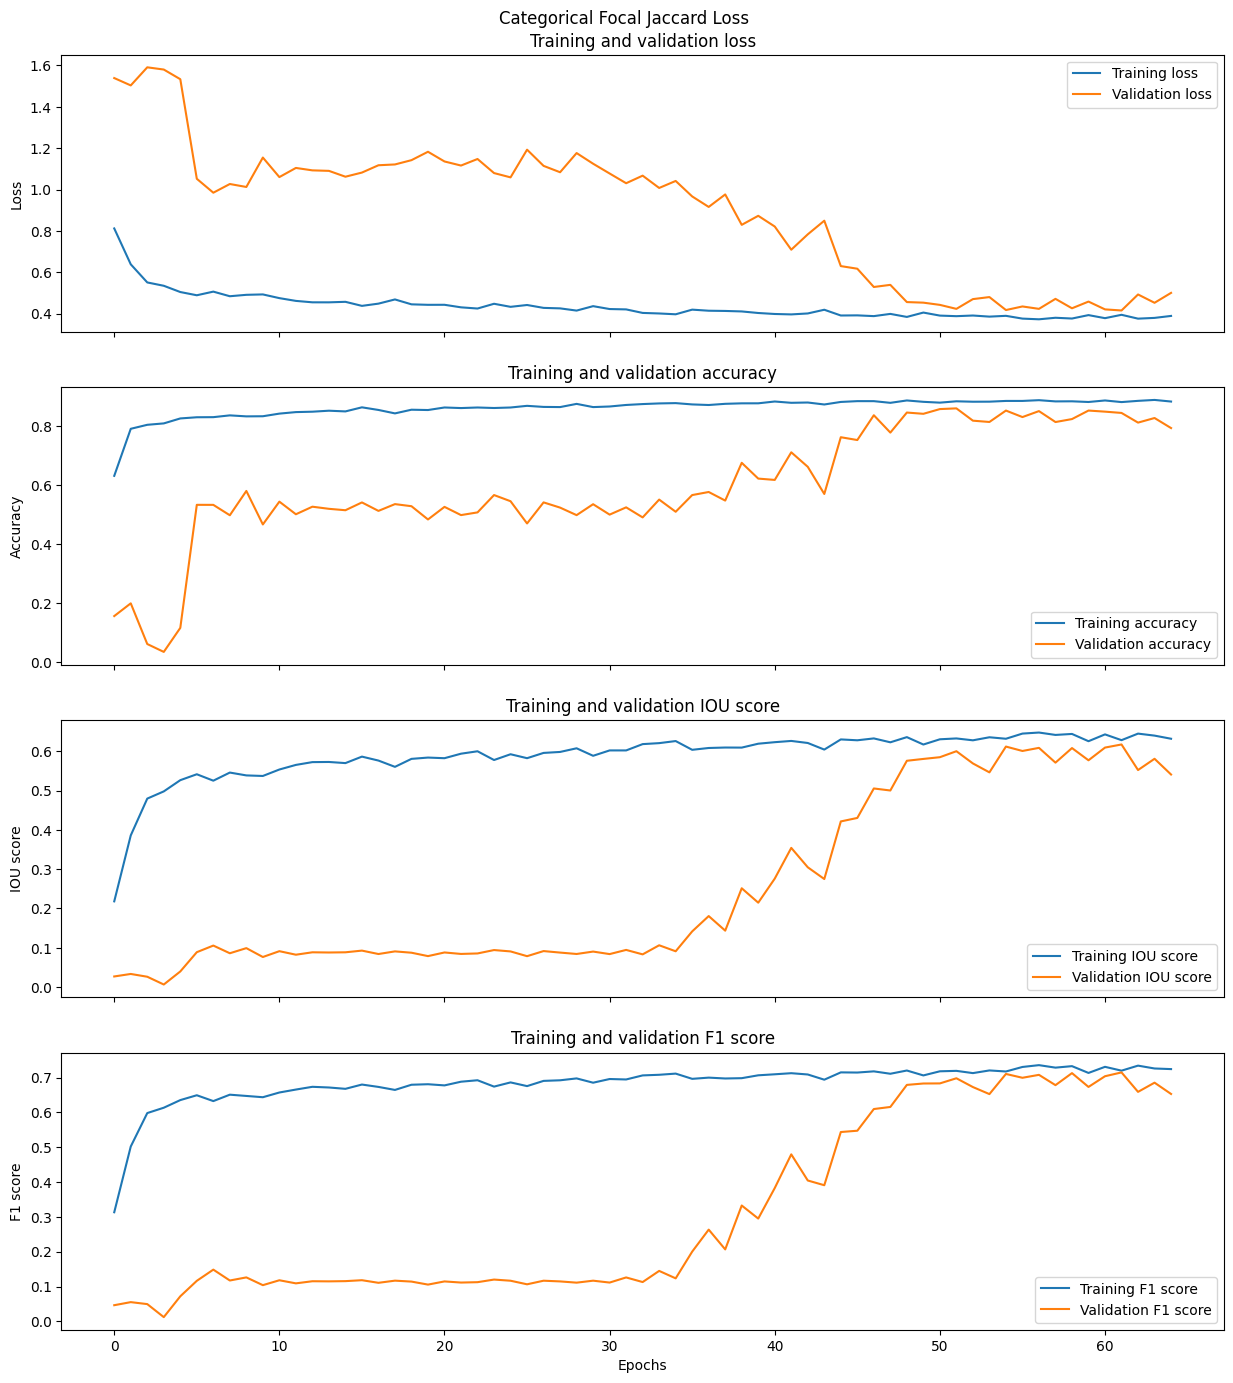

In [ ]:
display_training(history_1, 'Сategorical Focal Jaccard Loss')

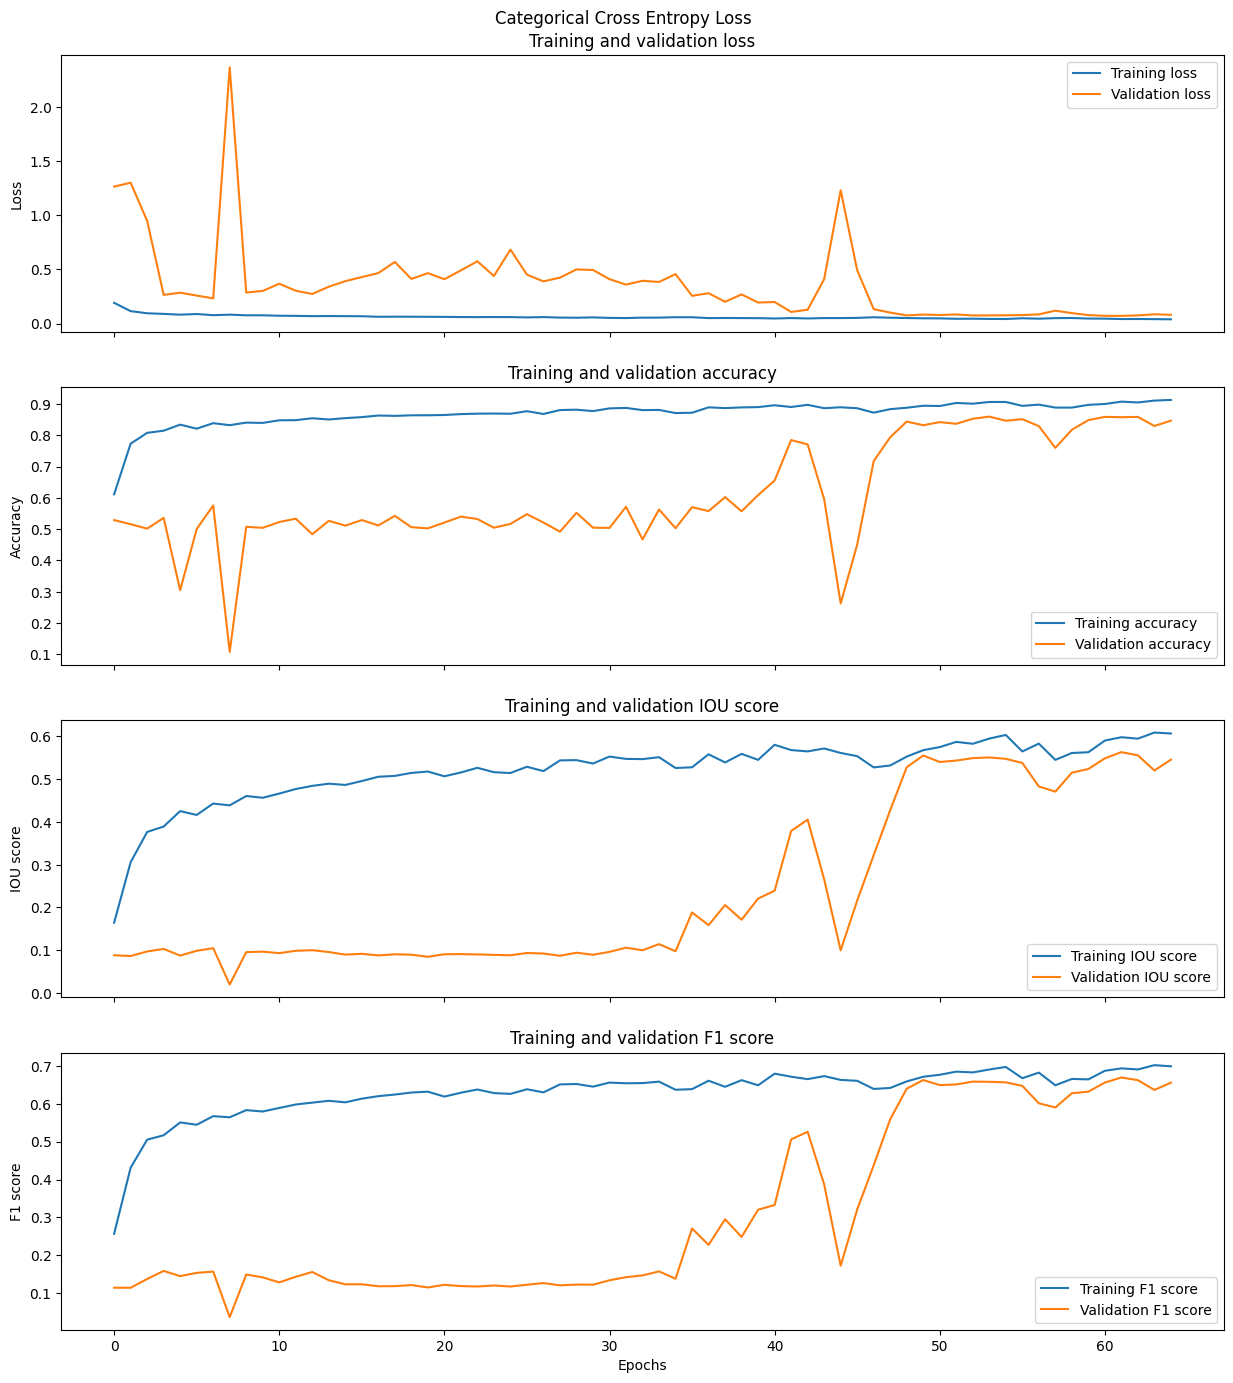

In [ ]:
display_training(history_2, 'Categorical Cross Entropy Loss')

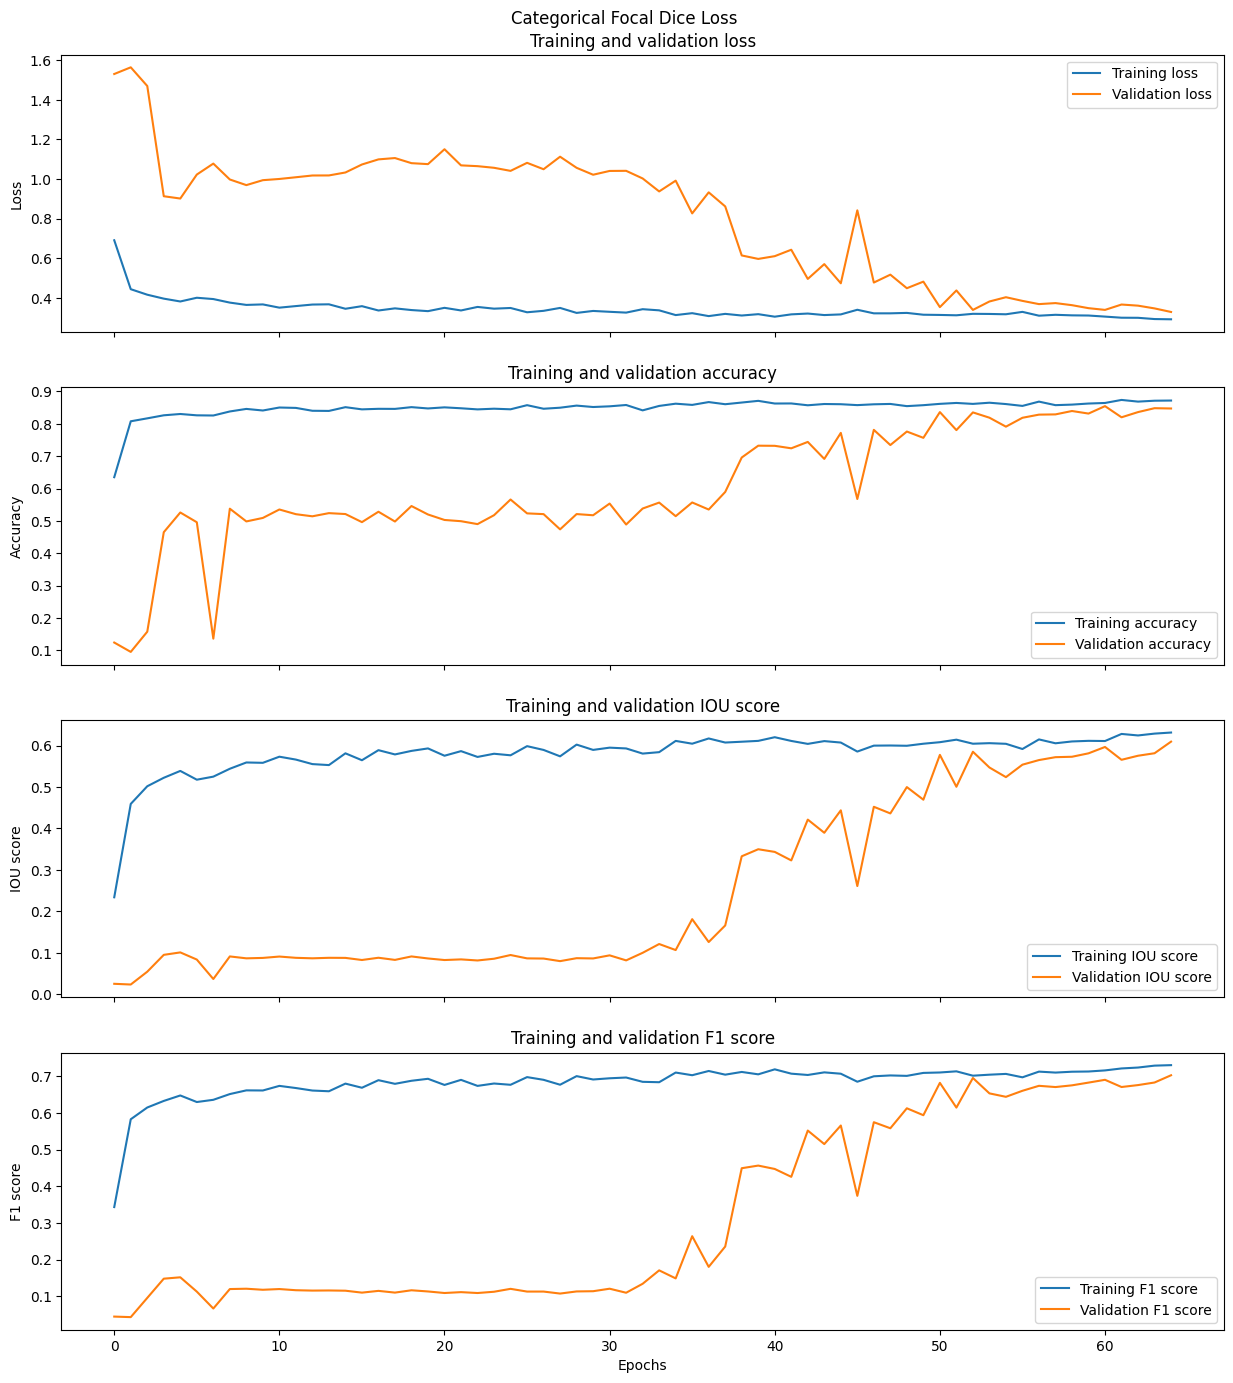

In [ ]:
display_training(history_3, 'Categorical Focal Dice Loss')

In [ ]:
from keras.models import load_model

metrics = ['accuracy', sm.metrics.iou_score, sm.metrics.FScore()]
model_1 = load_model('.\models\Model1.h5', compile=False)
model_1.compile(metrics=metrics)
test_pred_model_1 = model_1.evaluate(val_img_gen, steps=num_val_images)

model_2 = load_model('.\models\Model2.h5', compile=False)
model_2.compile(metrics=metrics)
test_pred_model_2 = model_2.evaluate(val_img_gen, steps=num_val_images)

model_3 = load_model('.\models\Model3.h5', compile=False)
model_3.compile(metrics=metrics)
test_pred_model_3 = model_3.evaluate(val_img_gen, steps=num_val_images)

138/138 [==============================] - 27s 193ms/step - loss: 0.0000e+00 - accuracy: 0.8506 - iou_score: 0.5991 - f1-score: 0.6970


In [ ]:
def print_model_evaluation(model_name, pred):
    print(f'Evaluation of {model_name}')
    print(F"Mean Accuracy = {pred[1]}") 
    print(F"Mean IOU = {pred[2]}") 
    print(F"Mean FScore = {pred[3]}") 
    print()


print_model_evaluation('Сategorical Focal Jaccard Loss', test_pred_model_1)
print_model_evaluation('Categorical Cross Entropy Loss', test_pred_model_2)
print_model_evaluation('Categorical Focal Dice Loss', test_pred_model_3)

Evaluation of Сategorical Focal Jaccard Loss
Mean Accuracy = 0.8108908534049988
Mean IOU = 0.5529412031173706
Mean FScore = 0.6618375778198242

Evaluation of Categorical Cross Entropy Loss
Mean Accuracy = 0.8558984398841858
Mean IOU = 0.554837167263031
Mean FScore = 0.6622941493988037

Evaluation of Categorical Focal Dice Loss
Mean Accuracy = 0.8505656123161316
Mean IOU = 0.5990725755691528
Mean FScore = 0.6969623565673828



In [ ]:
test_image_batch, test_mask_batch = val_img_gen.__next__()
test_mask_batch_argmax = np.argmax(test_mask_batch, axis=3) 

test_pred_batch_model_1 = model_1.predict(test_image_batch)
test_pred_batch_model_2 = model_2.predict(test_image_batch)
test_pred_batch_model_3 = model_3.predict(test_image_batch)

test_pred_batch_model_1_argmax = np.argmax(test_pred_batch_model_1, axis=3)
test_pred_batch_model_2_argmax = np.argmax(test_pred_batch_model_2, axis=3)
test_pred_batch_model_3_argmax = np.argmax(test_pred_batch_model_3, axis=3)

1/1 [==============================] - 0s 334ms/step


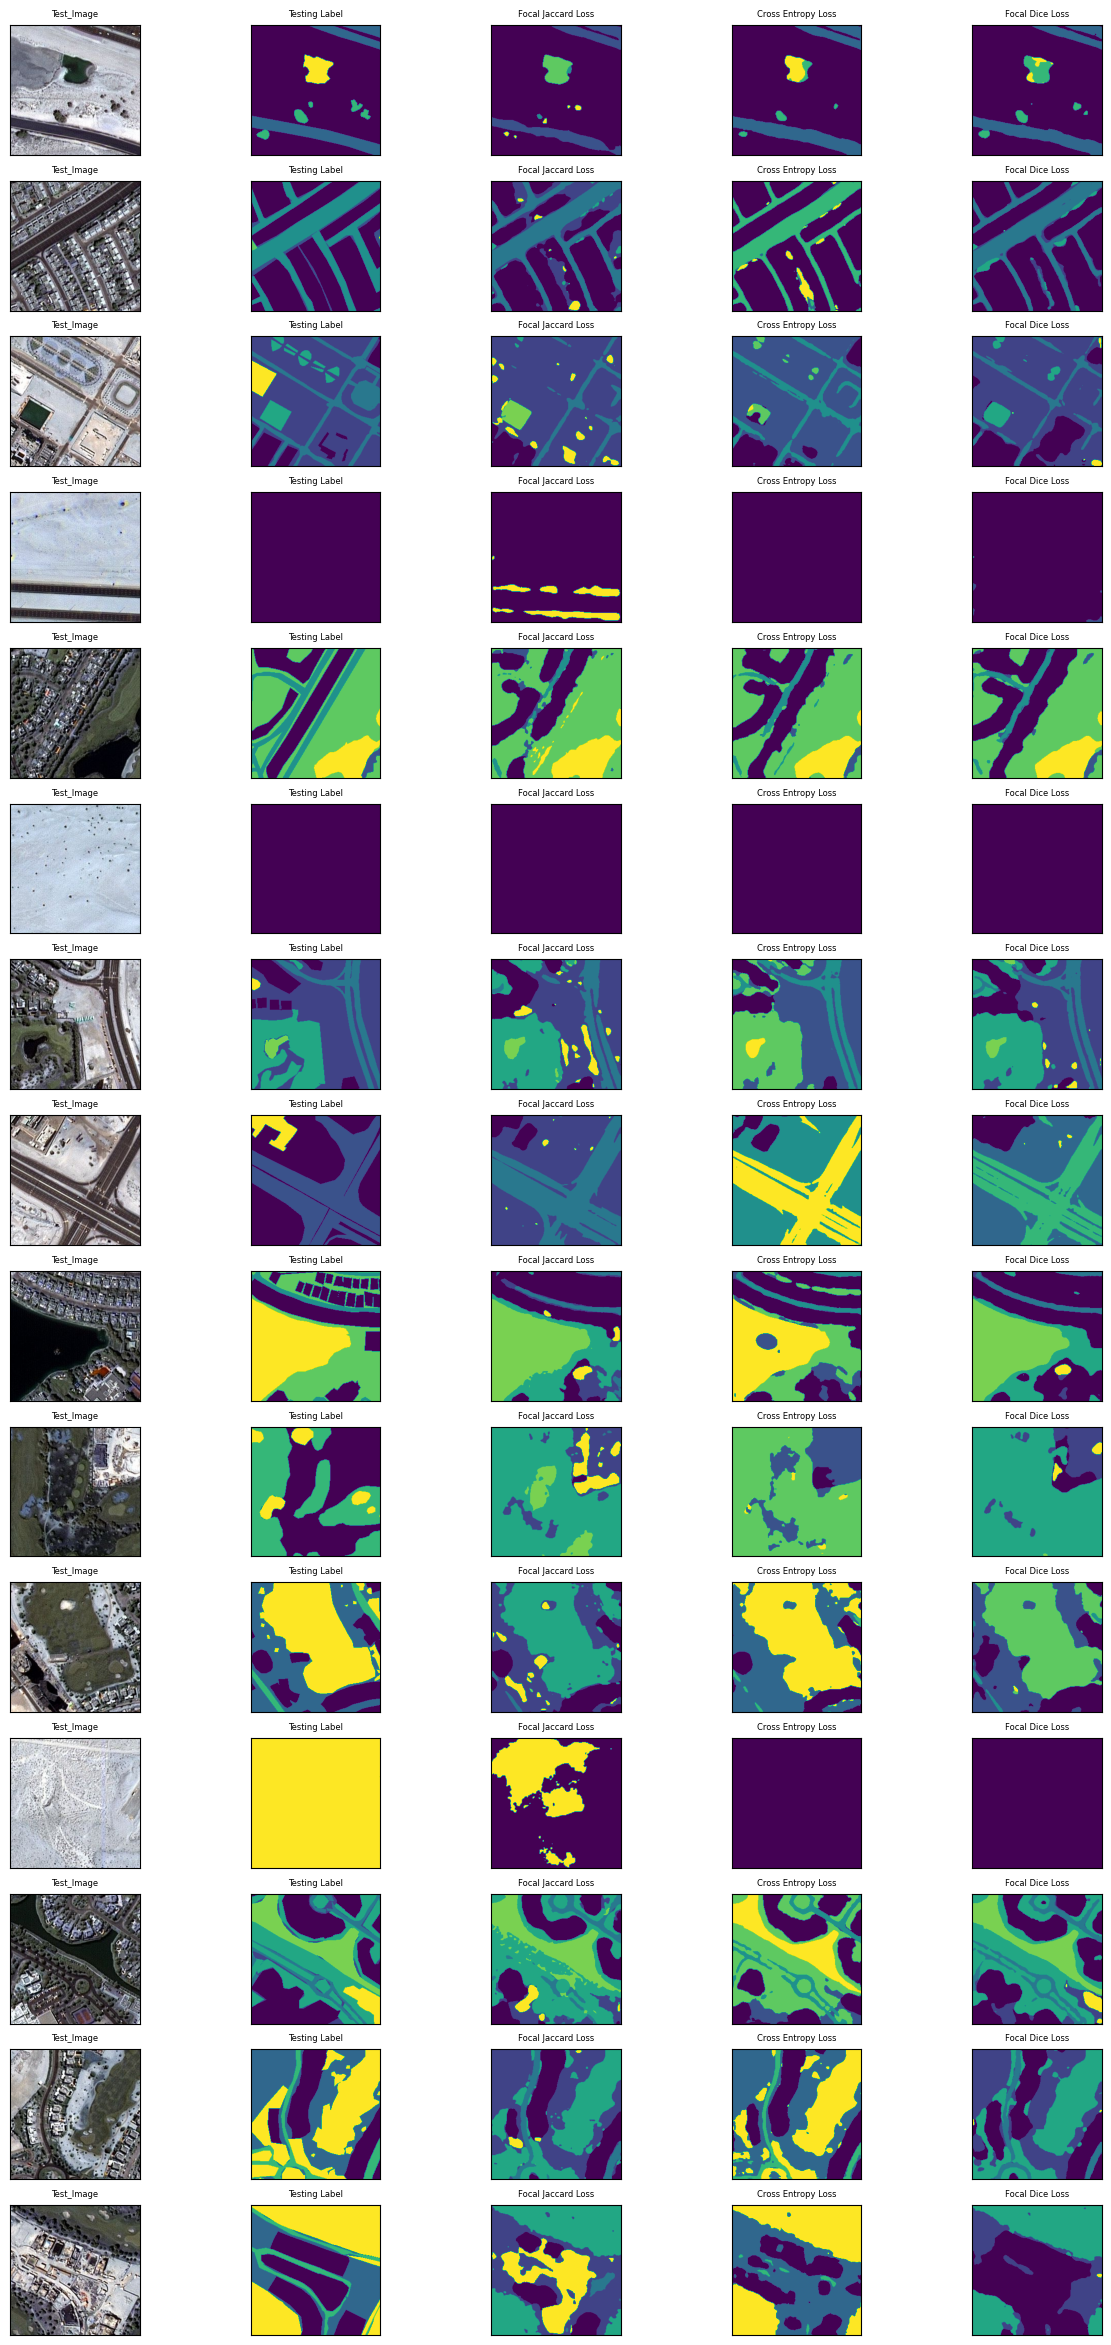

In [ ]:
fig, axis = plt.subplots(test_image_batch.shape[0]-1, 5)
fig.set_figwidth(15)
fig.set_figheight(30)

for img_num in range(test_image_batch.shape[0]-1):   
    
    axis[img_num][0].imshow(test_image_batch[img_num])
    axis[img_num][0].set_title('Test_Image', fontsize = 6)
    axis[img_num][0].axes.xaxis.set_visible(False)
    axis[img_num][0].axes.yaxis.set_visible(False)


    axis[img_num][1].imshow(test_mask_batch_argmax[img_num])
    axis[img_num][1].set_title("Testing Label", fontsize = 6)
    axis[img_num][1].axes.xaxis.set_visible(False)
    axis[img_num][1].axes.yaxis.set_visible(False)

    axis[img_num][2].imshow(test_pred_batch_model_1_argmax[img_num])
    axis[img_num][2].set_title("Focal Jaccard Loss", fontsize = 6)
    axis[img_num][2].axes.xaxis.set_visible(False)
    axis[img_num][2].axes.yaxis.set_visible(False)

    axis[img_num][3].imshow(test_pred_batch_model_2_argmax[img_num])
    axis[img_num][3].set_title("Cross Entropy Loss", fontsize = 6)
    axis[img_num][3].axes.xaxis.set_visible(False)
    axis[img_num][3].axes.yaxis.set_visible(False)

    axis[img_num][4].imshow(test_pred_batch_model_3_argmax[img_num])
    axis[img_num][4].set_title("Focal Dice Loss", fontsize = 6)
    axis[img_num][4].axes.xaxis.set_visible(False)
    axis[img_num][4].axes.yaxis.set_visible(False)
    
plt.show()
